# <font color = orange><b>Imports, and Data Fetch</b></font>

**imports**

<font color = magenta><b>%matplotlib inline</b></font>

In [200]:
#imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#sns - Samuel Norman “Sam” Seaborn - on the television serial drama The West Wing
import seaborn as sns
import pandas as pd
import numpy as np

**read configuration file**

In [201]:
#configuration
from read_config import Config
config = Config ()

**data**

*tips*

In [202]:
config.set_dataset_id ("tips")
df_tips = config.get_train_df ()
df_tips.head (2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


*iris*

In [203]:
config.set_dataset_id ("iris")
df_iris = config.get_train_df ()
df_iris.head (2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


*titanic*

In [204]:
config.set_dataset_id ("titanic")
df_titanic = config.get_train_df ()
df_titanic.head (2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# matplotlib.<font color = orange><b>pyplot</b></font> <font color = magenta><b>TODO</b></font>

https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Digits-Pixel-Components

- axis
    - annotate
    - set
    - scatter
    - axis
    - imshow
        - cmap
        - interpolation
        - clim
- plt
    - subplots
        - subplot_kw
            - xticks
            - yticks
        - gripspec_kw
            - hspace
            - wspace
    - figure
    - GridSpec
    - xlabel
    - ylabel
    - colorbar
- figure
    - add_subplot
- gridspec
    - https://matplotlib.org/tutorials/intermediate/gridspec.html

# <font color = orange><b>Dataframe.plot ()</b></font>

### Plot Stacked Bar Charts, for the 'Survived' and 'Not Survived' filters, for various fields.

#### Prepare a dataframe - using list of series

Define a function that creates **two series from the same field**. The series are one each for 'Survived', and 'Didn't Survive', and **we use the 'Survived' field as a filter to separate the two series**.

filter = df [<font color = magenta><b>col_filter</b></font>] == value <br>
df [filter]<font color = magenta><b>[col].value_counts ()</b></font>

In [205]:
def get_field_subtotals (field_name):
    f_survived = df_titanic ['Survived'] == 1
    s_survived = df_titanic [f_survived][field_name]\
    .value_counts ()

    f_not_survived = df_titanic ['Survived'] != 1
    s_not_survived = df_titanic [f_not_survived][field_name]\
    .value_counts ()
    
    return [s_survived, s_not_survived]

example **usage**

In [206]:
get_field_subtotals ('Sex')

[female    233
 male      109
 Name: Sex, dtype: int64, male      468
 female     81
 Name: Sex, dtype: int64]

Below, this is how a **data frame created using get_field_subtotals ()** looks like. Since the two series are returned in a list, each series forms a row. The index of the series forms the column names. The name of each series is the field it was created from ('Sex'). These names form the index of the data frame.

In [207]:
pd.DataFrame (get_field_subtotals ('Sex'))

,female,male
Sex,233,109
Sex,81,468


In [208]:
pd.DataFrame (get_field_subtotals ('Sex')).index

Index(['Sex', 'Sex'], dtype='object')

We should change the index values to something meaningful, like, the filter we used to segregate the rows into two series.

In [209]:
pd.DataFrame (get_field_subtotals ('Sex'),\
              index = ['Survived', 'Didn''t Survive'])

,female,male
Survived,233,109
Didnt Survive,81,468


#### Prepare a data frame - using <font color = magenta><b>df.groupby ().size ().unstack ()</b></font>

In [210]:
df = df_titanic.groupby (['Survived', 'Sex']).size ().unstack ()
df

Sex,female,male
Survived,,
0,81,468
1,233,109


#### How to plot the data frames

<font color = magenta><b>Unstacked Bar Chart</b></font> using data frame created from **list of series**

<font color = magenta><b>df.plot</b></font> (<font color = magenta><b>kind = </b></font>'bar')

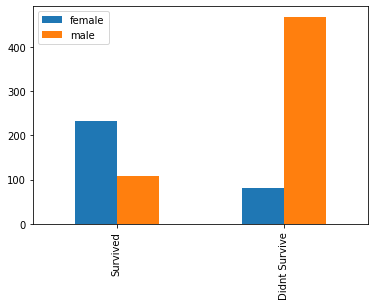

In [211]:
pd.DataFrame (get_field_subtotals ('Sex'),\
              index = ['Survived', 'Didn''t Survive'])\
.plot (kind = 'bar')
plt.show ()

<font color = magenta><b>Stacked Bar Chart</b></font> using data frame created from **list of series**

df.plot (kind = 'bar', <font color = magenta><b>stacked = 'True'</b></font>)

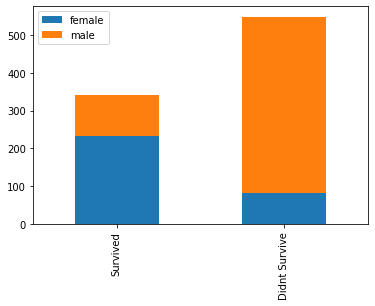

In [212]:
pd.DataFrame (get_field_subtotals ('Sex'), \
              index = ['Survived', 'Didn''t Survive']) \
.plot (kind = 'bar', stacked = 'True')
plt.show ()

<font color = magenta><b>Stacked Bar Chart</b></font> using data frame created from <font color = magenta><b>groupby.size.unstack</b></font>

**groupby on two fields**,
- the **first field** in the groupby clause is plotted on the **X-axis**
> this is the <font color = magenta><b>index</b></font> of the dataframe returned from unstack ()
- the **second field** in the groupby clause forms the **Y-axis**
> this is the <font color = magenta><b>unstacked feature</b></font> that forms columns in the dataframe returned from unstack ()

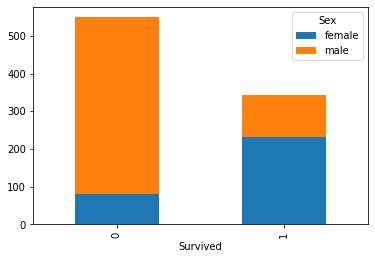

In [213]:
df_titanic.groupby (['Survived', 'Sex'])\
.size ().unstack ()\
.plot (kind = 'bar', stacked = True)
plt.show ()

Define a helper function that plots the data frame.

In [214]:
def plot_stacked_bar_chart (df, l_fields):
    df.groupby (l_fields).size ().unstack ()\
    .plot (kind = 'bar', stacked = True)
    plt.show ()

example **usage**, plot 'Sex' stacked bar

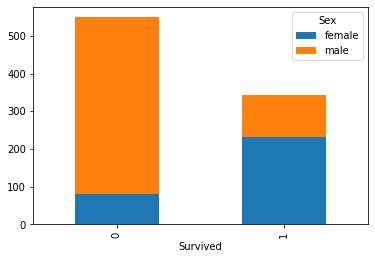

In [215]:
plot_stacked_bar_chart (df_titanic, ['Survived', 'Sex'])

example **usage**, plot 'Pclass' stacked bar

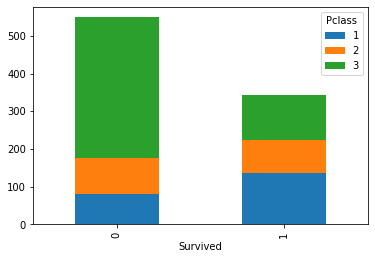

In [216]:
plot_stacked_bar_chart (df_titanic, ['Survived', 'Pclass'])

<font color = magenta><b>Stacked Bar Chart</b></font> using data frame created from groupby.size.unstack (<font color = magenta><b>col_name</b></font>)

We mention **Survived** as the <font color = magenta><b>feature to be unstacked</b></font>.

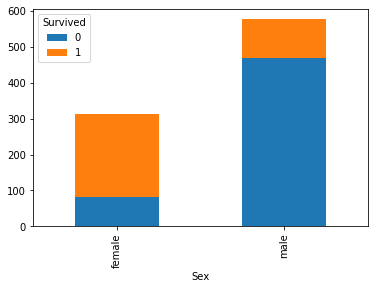

In [217]:
df_titanic.groupby (['Survived', 'Sex'])\
.size ().unstack ('Survived')\
.plot (kind = 'bar', stacked = True)
plt.show ()

# <font color = orange><b>Seaborn</b></font>

Seaborn is <font color = magenta><b>built on matplotlib</b></font>

As for Seaborn, you have **two types of functions**: <font color = magenta><b>axes-level</b></font> functions and <font color = magenta><b>figure-level</b></font> functions. The ones that operate on the Axes level are, for example, **regplot(), boxplot(), kdeplot()**, …, while the functions that operate on the Figure level are **lmplot(), factorplot(), jointplot()** and a couple others.

The way you can tell whether a function is **“figure-level” or “axes-level”** is that axes-level functions takes an <font color = magenta><b>ax=</b></font> parameter. You can also distinguish the two classes by their output type: axes-level functions <font color = magenta><b>return the matplotlib axes</b></font>, while figure-level functions <font color = magenta><b>return the FacetGrid</b></font>.

## Axes-level functions

<font color = magenta><b>Axes-level</b></font> functions

- violinplot ()
- swarmplot ()
- scatterplot ()
- boxplot ()
- kdeplot ()
- regplot ()

> returns matplotlib.axes._subplots.<font color = magenta><b>AxesSubplot</b></font>

**violinplot** - tips

sns.<font color = magenta><b>violinplot</b></font> (**x =** colname, **data =** df)

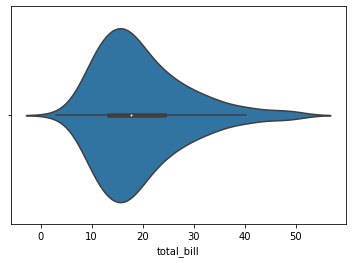

In [218]:
sns.violinplot (x = 'total_bill', data = df_tips)
plt.show ()

**swarmplot** - iris

sns.<font color = magenta><b>swarmplot</b></font> (**x =** dim_x, **y =** dim_y, **data =** df)

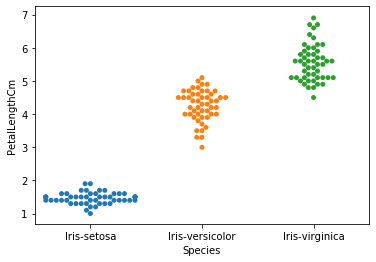

In [219]:
sns.swarmplot (x = 'Species', y = 'PetalLengthCm', data = df_iris)
plt.show ()

**scatterplot** - tips

sns.<font color = magenta><b>scatterplot</b></font> (dim_x, dim_y, data = )

*scatterplot is suitable for both <font color = magenta><b>continuous and discrete</b></font> variables.

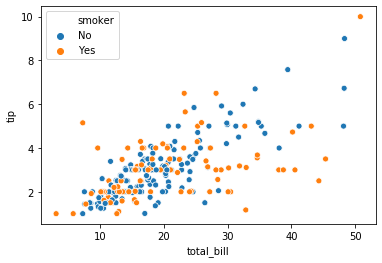

In [220]:
sns.scatterplot ("total_bill", "tip", "smoker", data = df_tips)
plt.show ()

> scatterplot plot using a **FacetGrid**

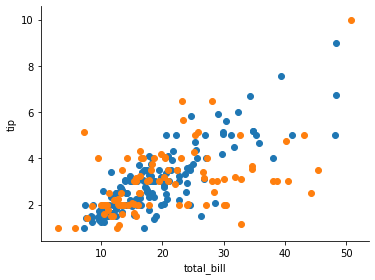

In [221]:
fg = sns.FacetGrid (df_tips, hue = "smoker", height = 4, aspect = 1.33)
fg.map (plt.scatter, "total_bill", "tip")
plt.show ()

**boxplot** - tips

sns.<font color = magenta><b>boxplot</b></font> (**x** = dim_x, **data** = df)

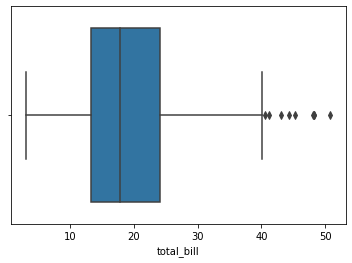

In [222]:
sns.boxplot (x = "total_bill", data = df_tips)
plt.show ()

**kdeplot** - titanic

sns.<font color = magenta><b>kdeplot</b></font> (df[**col**])

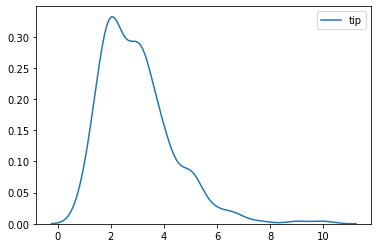

In [223]:
sns.kdeplot (df_tips["tip"])
plt.show ()

**heatmap** - titanic

sns.<font color = magenta><b>heatmap</b></font> (df.**corr** ())

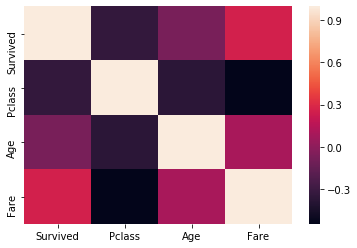

In [254]:
df_temp = df_titanic.drop (['PassengerId', 'Name', \
                  'Cabin', 'SibSp', 'Parch'], axis = 1)
sns.heatmap (df_temp.corr ())
plt.show ()

## Figure-level functions

<font color = magenta><b>Figure-level</b></font> functions

- lmplot () - Linear [regression] Model
- catplot () - was known as factorplot ()
- jointplot () -  **illuminating the structure of a dataset**
- pairplot () -  illuminating the structure of a dataset

> returns seaborn.axisgrid.<font color = magenta><b>FacetGrid</b></font> <br>
> **FacetGrid.axes** returns the axes

These are optimized for <font color = magenta><b>exploratory analysis</b></font> because they set up the matplotlib figure containing the plot(s) and make it easy to <font color = magenta><b>spread out the visualization across multiple axes</b></font>. They also handle some tricky business like putting the legend outside the axes. To do these things, they use a seaborn <font color = magenta><b>FacetGrid</b></font>.

### 1. Figure-level and axes-level functions

**Each different figure-level plot kind combines a particular “axes-level” function with the FacetGrid object**. For example, the scatter plots are drawn using the scatterplot() function, and the bar plots are drawn using the barplot() function. These functions are called **“axes-level”** because they <font color = magenta><b>draw onto a single matplotlib axes</b></font> and don’t otherwise affect the rest of the figure.

The upshot is that the figure-level function needs to control the figure it lives in, while axes-level functions can be combined into a more complex matplotlib figure with other axes that **may or may not have seaborn plots** on them:

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


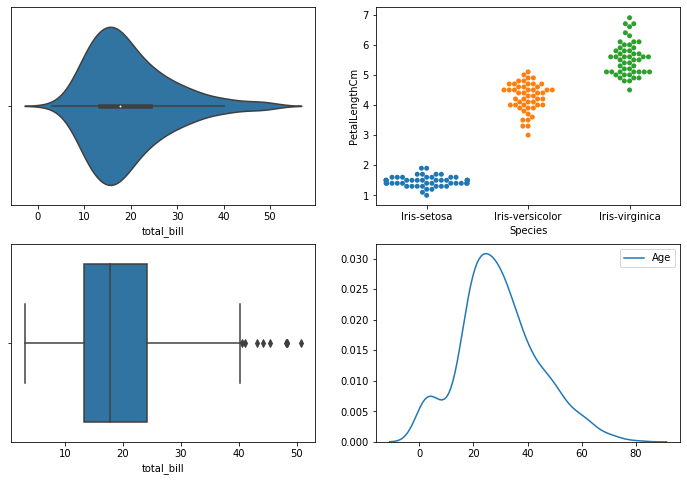

In [224]:
fig, ax = plt.subplots (2, 2, figsize = (12, 8))
sns.violinplot (x = 'total_bill', data = df_tips, ax = ax[0][0])
sns.swarmplot (x = 'Species', y = 'PetalLengthCm', data = df_iris, ax = ax[0][1])
sns.boxplot (x = "total_bill", data = df_tips, ax = ax[1][0])
sns.kdeplot (df_titanic ["Age"], ax = ax[1][1])
plt.show ()

Controlling the size of the figure-level functions works a little bit differently than it does for other matplotlib figures. Instead of setting the overall figure size, the figure-level functions are parameterized by the size of each facet. And instead of setting the height and width of each facet, you control the **height** and **aspect ratio** (ratio of width to height). This parameterization makes it easy to control the size of the graphic <font color = magenta><b>without thinking about exactly how many rows and columns it will have</b></font>, although it can be a source of confusion.

### 2. Statistical Estimation

#### lmplot

<font color = magenta><b>lmplot</b></font> (**x** = , **y** = , **data** = )

FacetGrid.fig.<font color = magenta><b>suptitle</b></font> ()

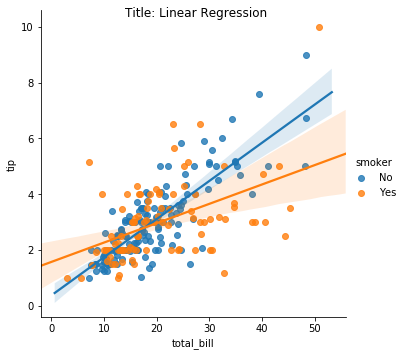

In [225]:
fgrid = sns.lmplot (x = "total_bill", y = "tip", hue = "smoker", \
                 data = df_tips)
# Add a title to the Figure
fig = fgrid.fig
fig.suptitle('Title: Linear Regression', fontsize=12)
plt.show ()

### 3. Specialized Categorical Plots

#### catplot

exposes a common dataset-oriented API that <font color = magenta><b>generalizes over different representations</b></font> of the relationship between <font color = magenta><b>one numeric variable</b></font> and <font color = magenta><b>one (or more) categorical variables</b></font>.

sns.<font color = magenta><b>catplot</b></font> (**dim_x**, **dim_y**, **dim_z**, **data =** df, <font color = magenta><b>kind = bar</b></font>, palette = )

**'Survived'** is numerical

Controlling the size of the figure-level functions works a little bit differently than it does for other matplotlib figures. Instead of setting the overall figure size, the figure-level functions are parameterized by the size of each facet. And instead of setting the height and width of each facet, you control the **height** and **aspect ratio** (ratio of width to height). This parameterization makes it easy to control the size of the graphic <font color = magenta><b>without thinking about exactly how many rows and columns it will have</b></font>, although it can be a source of confusion.

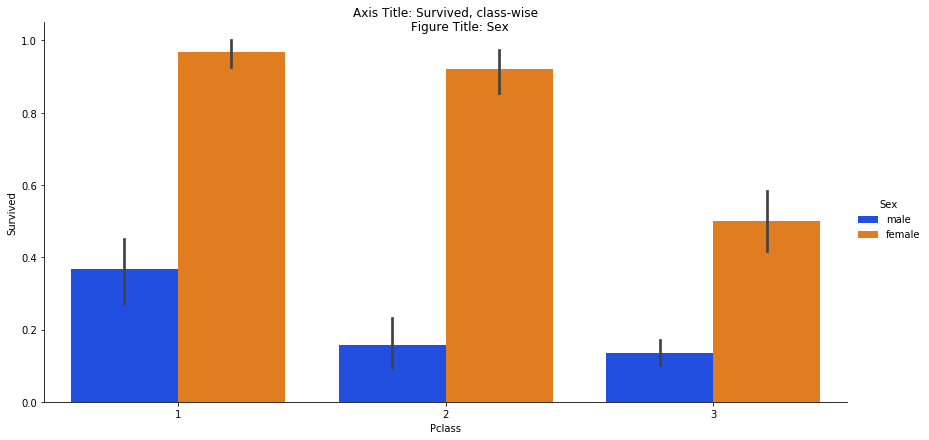

In [226]:
fgrid = sns.catplot (x = "Pclass", y = "Survived", hue = "Sex",\
             data = df_titanic, \
                kind = "bar", palette = "bright",\
             height = 6, aspect = 2)
ax = fgrid.ax
ax.set_title ('Axis Title: Survived, class-wise')
fig = fgrid.fig
fig.suptitle ('Figure Title: Sex')
plt.show ()

sns.<font color = magenta><b>catplot</b></font> (**dim_x**, **dim_y**, **dim_z**, **data =** df, <font color = magenta><b>kind = violin</b></font>, palette = )

**'total_bill'** is numerical

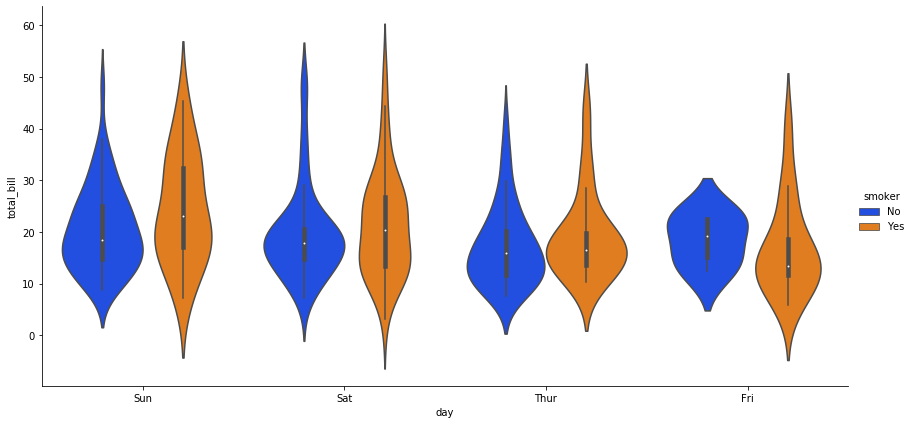

In [227]:
sns.catplot (x = "day", y = "total_bill", hue = "smoker",\
             data = df_tips, \
                kind = "violin", palette = "bright",\
             height = 6, aspect = 2)
plt.show ()

sns.<font color = magenta><b>catplot</b></font> (**dim_x**, **dim_y**, **dim_z**, **data =** df, <font color = magenta><b>kind = box</b></font>, palette = )

**'total_bill'** is numerical

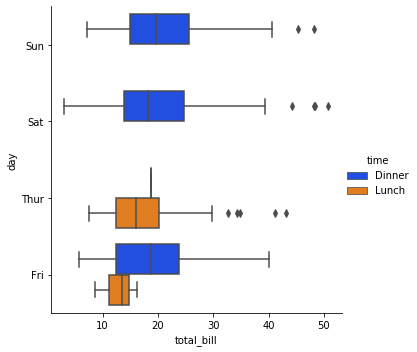

In [228]:
sns.catplot (x = "total_bill", y = "day", hue = "time",\
             data = df_tips, \
                kind = "box", palette = "bright")
plt.show ()

### 4. Visualizing Dataset Structure

#### jointplot

sns.<font color = magenta><b>jointplot</b></font> (**x** = , **y** = , **data** = )

focuses on a <font color = magenta><b>single relationship</b></font>

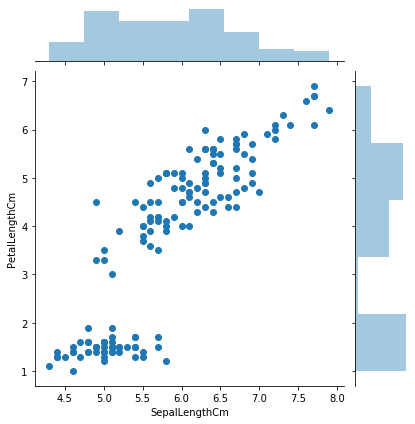

In [229]:
sns.jointplot (x = "SepalLengthCm", y = "PetalLengthCm", data = df_iris)
plt.show ()

sns.jointplot (x = , y = , data = , <font color = magenta><b>kind = 'kde'</b></font>)

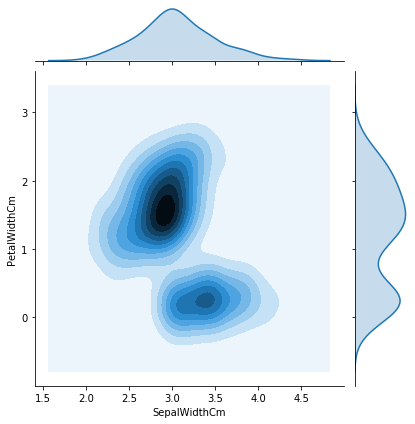

In [239]:
sns.jointplot (x = 'SepalWidthCm', y = 'PetalWidthCm', data = df_iris,\
               kind = 'kde')
plt.show ()

#### pairplot - iris

sns.<font color = magenta><b>pairplot</b></font> (**data** = , **hue** = )

This plot takes a broader view, showing <font color = magenta><b>all pairwise relationships</b></font> and the **marginal distributions**, optionally **conditioned** on a categorical variable

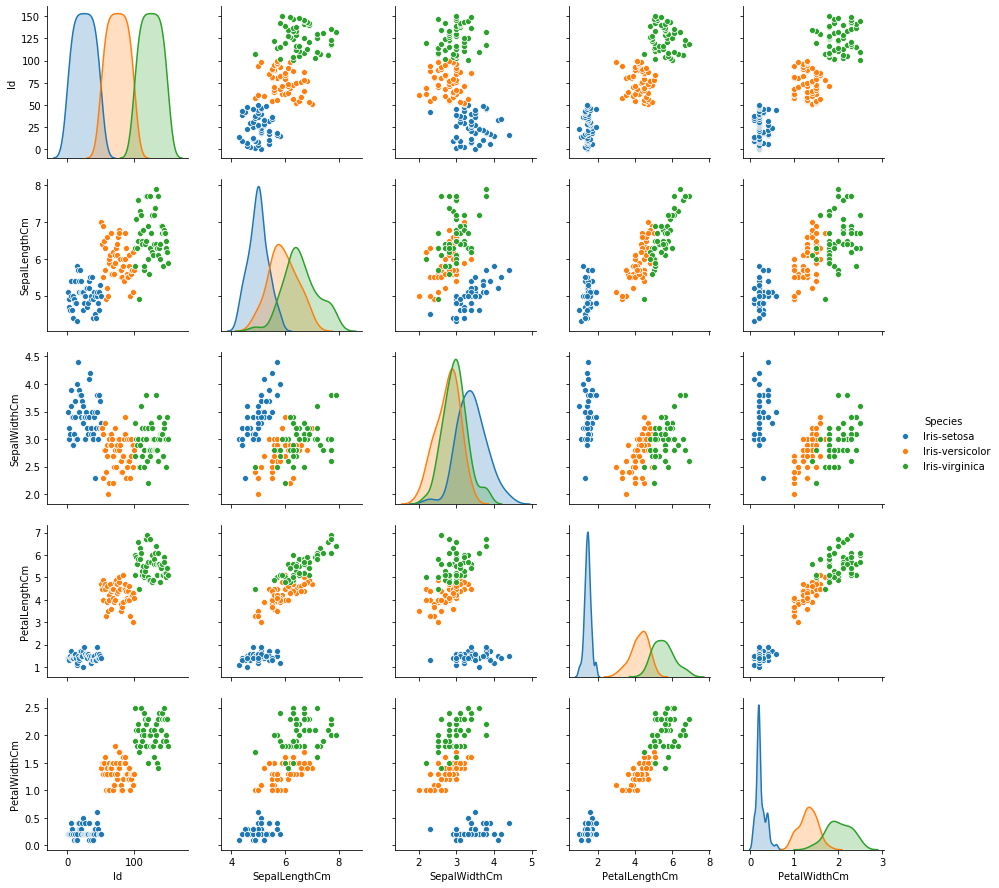

In [230]:
sns.pairplot (data = df_iris, hue = "Species")
plt.show ()

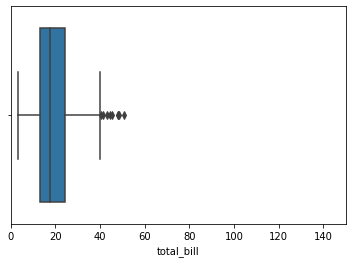

In [231]:
#returns matplotlib.axes._subplots.AxesSubplot
fig, ax = plt.subplots ()
ax.set (xlim = (0, 150))
ax = sns.boxplot (x = "total_bill", data = df_tips, ax = ax)
#ax.set (xlim = (0, 100))
plt.show ()

## FacetGrid

A FacetGrid can be drawn with up to three dimensions − <font color = magenta><b>row, col, and hue</b></font>. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a <font color = magenta><b>depth axis</b></font>, where different levels are plotted with <font color = magenta><b>different colors</b></font>.

The variables should be **categorical** and the <font color = magenta><b>data at each level</b></font> of the variable will be used for a <font color = magenta><b>facet along that axis</b></font>.

<font color = red><b>Warning</b></font>: When using seaborn functions that **infer semantic mappings** from a dataset, care must be taken to **synchronize those mappings across facets**. In most cases, it will be **better to use** a figure-level function (e.g. relplot() or <font color = magenta><b>catplot</b></font>()) than to use FacetGrid directly.

facet = sns.<font color = magenta><b>FacetGrid</b></font> (df, **row** = , **col** = , **hue** = )

facet.<font color = magenta><b>map</b></font> (<font color = magenta><b>plt.type</b></font>, **dim_x**, [**dim_y**])

> facet = sns.FacetGrid (df, **col** = ) <br>
> facet.map (plt.<font color = magenta><b>hist</b></font>, **dim_x**)

*histogram is suitable for <font color = magenta><b>continuous</b></font> variables*. For discrete variables, we can use bar chart.

> Tips

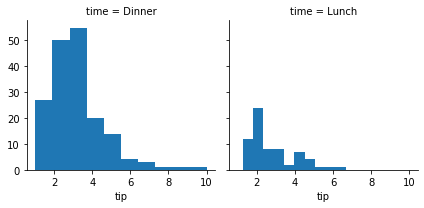

In [232]:
facet = sns.FacetGrid (df_tips, col = "time")
facet.map (plt.hist, "tip")
plt.show ()

> Plot a <font color = magenta><b>Probability Density Function</b></font> of 'Age', from the Survived and Not Survived groups <br>
> facet = sns.FacetGrid (df, **hue** =) <br>
> facet.map (<font color = magenta><b>sns.kdeplot</b></font>, dim_x)  <br>
> KDE Plot described as <font color = magenta><b>Kernel Density Estimate</b></font> is used for visualizing the Probability Density of a continuous variable. **y-axis**  <br>
> variable to be plotted - **x-axis**

> Titanic

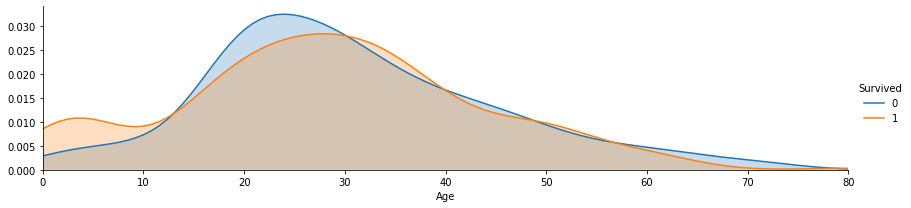

In [233]:
facet = sns.FacetGrid (df_titanic, hue = 'Survived', aspect = 4)
facet.map (sns.kdeplot, 'Age', shade = True)
facet.set (xlim = (0, df_titanic ['Age'].max ()))
facet.add_legend ()
plt.show ()

> facet = sns.FacetGrid (df, **col** = , **hue** =) <br>
> facet.map (plt.<font color = magenta><b>scatter</b></font>, **dim_x**, **dim_y**)

> Tips

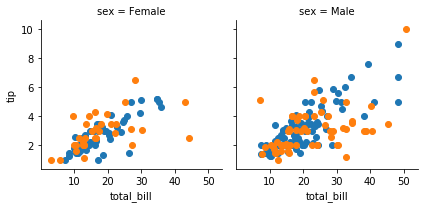

In [234]:
facet = sns.FacetGrid (df_tips, col = "sex", hue = "smoker")
facet.map (plt.scatter, "total_bill", "tip")
plt.show ()

> facet = sns.FacetGrid (df, **row** =, col =, hue =) <br>
> facet.map (plt.scatter, dim_x, dim_y)

> Tips

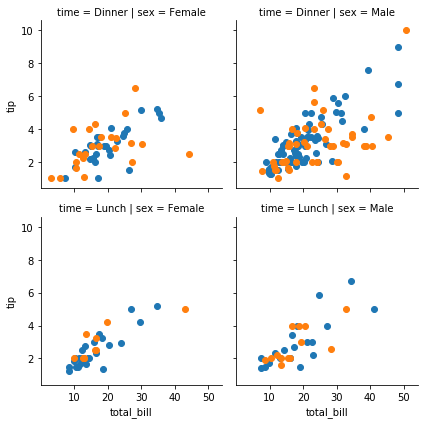

In [235]:
facet = sns.FacetGrid (df_tips, row = "time",\
                       col = "sex", hue = "smoker")
facet.map (plt.scatter, "total_bill", "tip")
plt.show ()

> some **customizations**

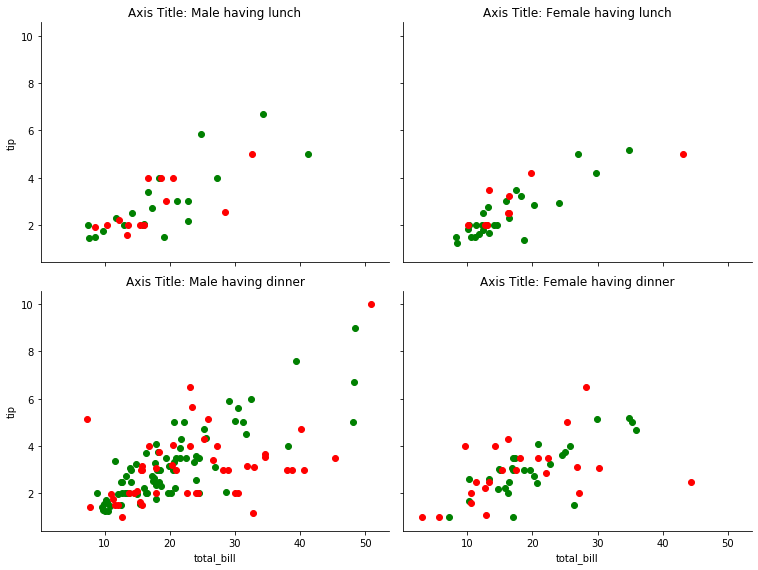

In [236]:
pal = {'Yes': 'red', 'No': 'green'}
fgrid = sns.FacetGrid (df_tips, row = "time", col = "sex", \
                    col_order = ['Male', 'Female'], \
                    row_order = ['Lunch', 'Dinner'], \
                    hue = "smoker", \
                    height = 4, aspect = 1.33, \
                   palette = pal)
fgrid.map (plt.scatter, "total_bill", "tip")

#titles
ax = fgrid.axes
ax[0][0].set_title ('Axis Title: Male having lunch')
ax[0][1].set_title ('Axis Title: Female having lunch')
ax[1][0].set_title ('Axis Title: Male having dinner')
ax[1][1].set_title ('Axis Title: Female having dinner')
fig = fgrid.fig
#fig.suptitle ('Figure Title: Total Bill and Tips across dimensions')

plt.show ()

> <font color = red><b>problems with hue</b></font>

FacetGrid can also represent levels of a third variable with the **hue** parameter, which plots different subsets of data in different colors. This uses color to resolve elements on a third dimension, but only <font color = magenta><b>draws subsets on top of each other</b></font> and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.

> Tips

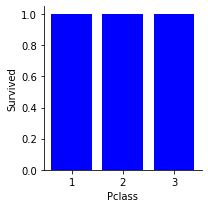

In [237]:
pal = {'male': 'blue', 'female': 'pink'}
fg = sns.FacetGrid (df_titanic, hue = "Sex", \
                    hue_order = ['female', 'male'], \
                   palette = pal)
fg.map (plt.bar, 'Pclass', 'Survived')
plt.show ()

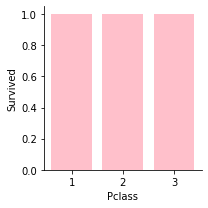

In [238]:
pal = {'male': 'blue', 'female': 'pink'}
fg = sns.FacetGrid (df_titanic, hue = "Sex", \
                    hue_order = ['male', 'female'], \
                   palette = pal)
fg.map (plt.bar, 'Pclass', 'Survived')
plt.show ()